In [1]:
import sys, os
os.chdir("..")
sys.path.append("classifier")

In [2]:
import pickle
import torch
from dataloader import AslDataset, AslTestDataset, preprocess_image
from torch.utils.data import DataLoader, RandomSampler, TensorDataset
import glob
from PIL import Image

train_data = AslDataset("data/asl_alphabet_train/asl_alphabet_train")
train_loader = DataLoader(train_data, sampler=RandomSampler(train_data))

test_data = AslTestDataset("data/asl_alphabet_test/asl_alphabet_test", train_data.classes)
test_loader = DataLoader(test_data)

with open("model.pkz", "rb") as f:
    image_net, model, classes = pickle.load(f)

/tmp/ipykernel_50234/43865402.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  est = torch.nn.functional.softmax(emb).argmax()


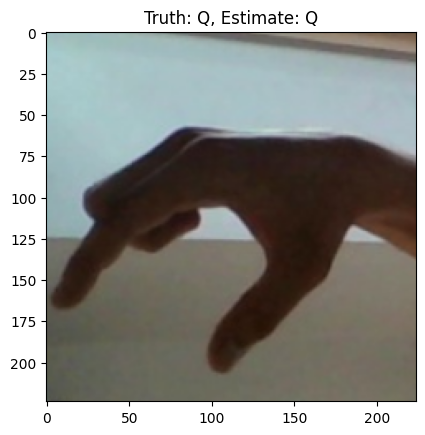

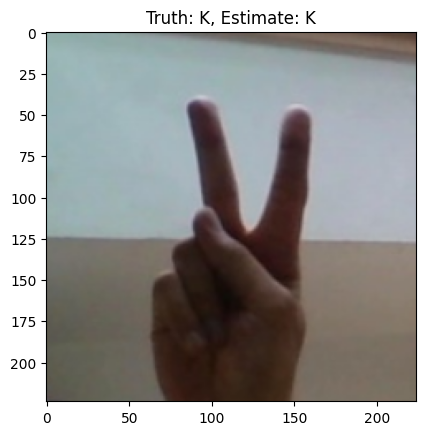

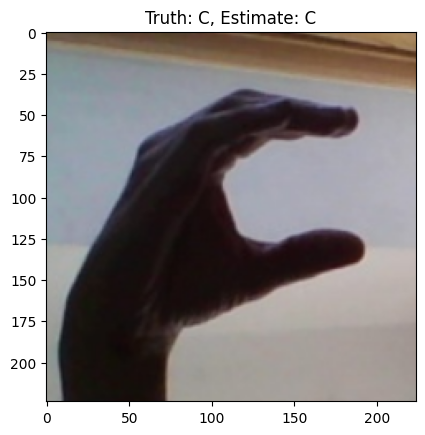

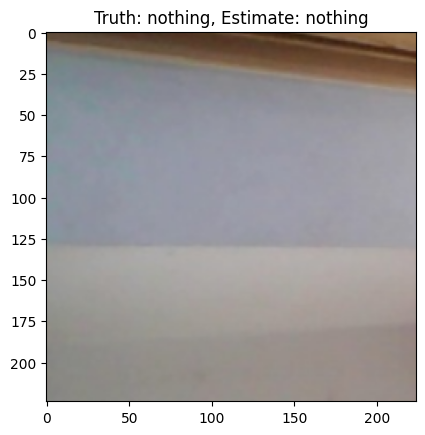

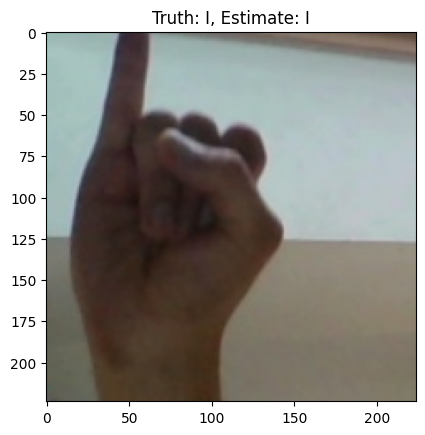

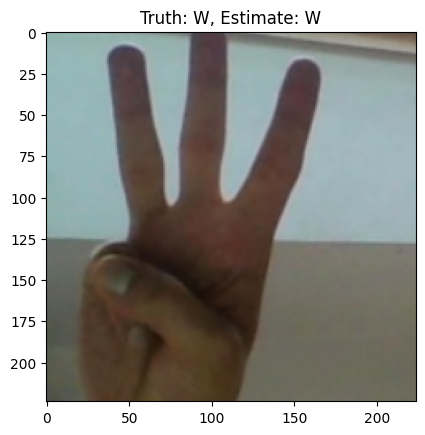

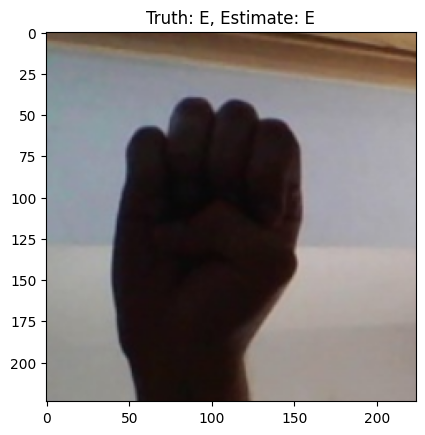

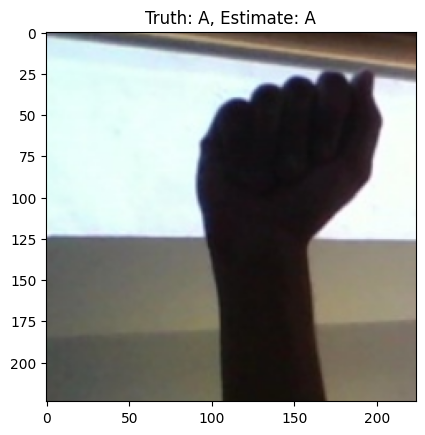

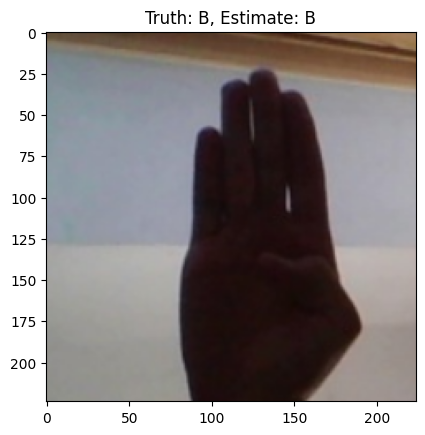

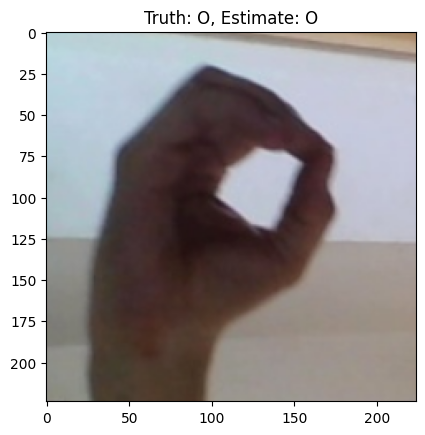

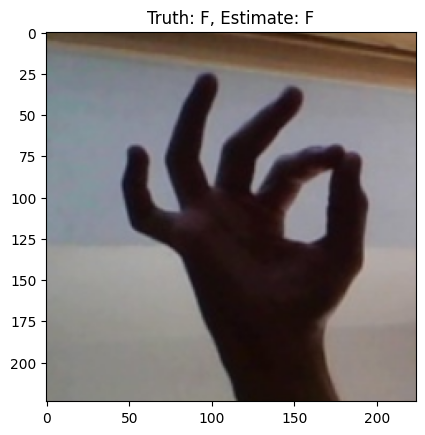

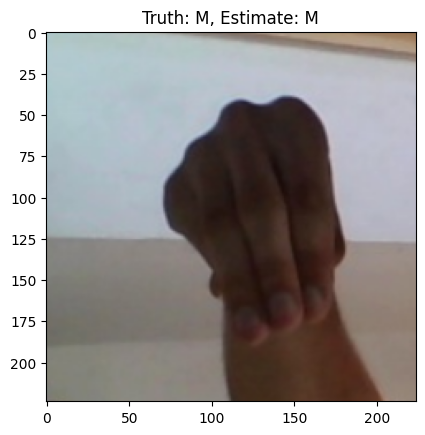

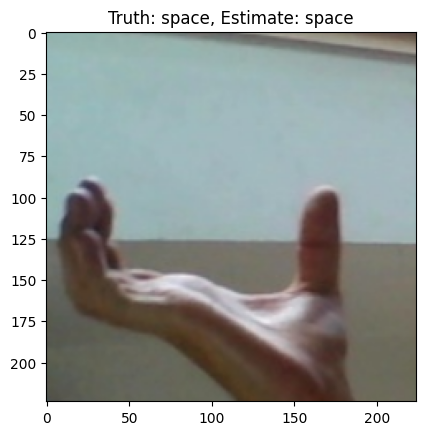

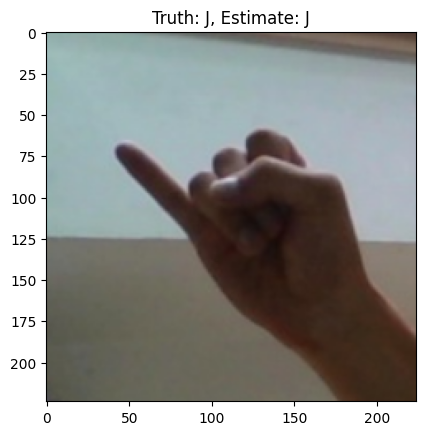

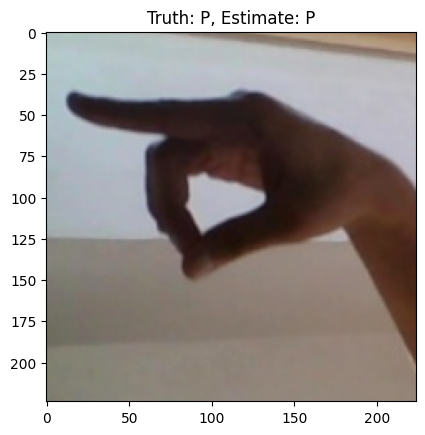

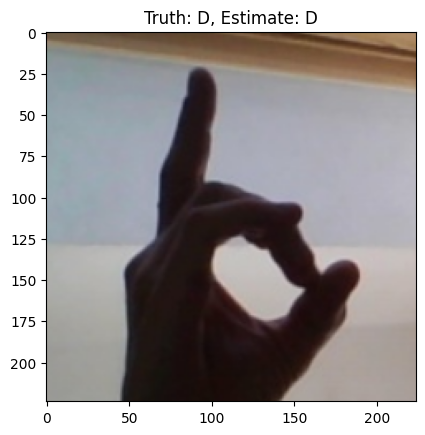

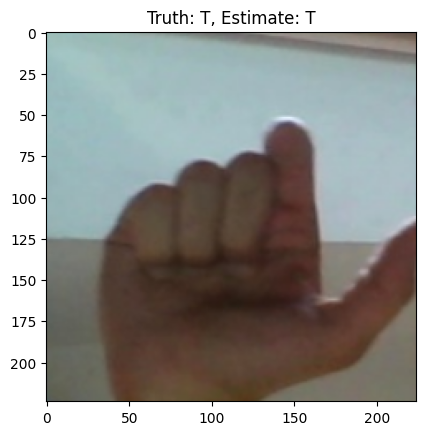

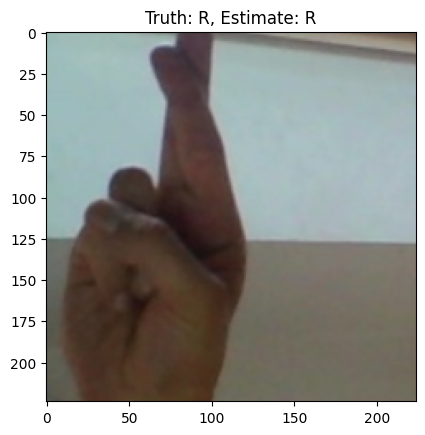

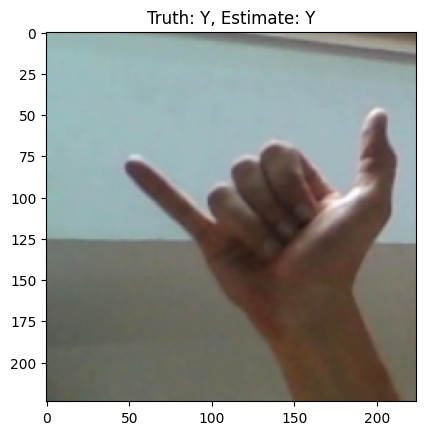

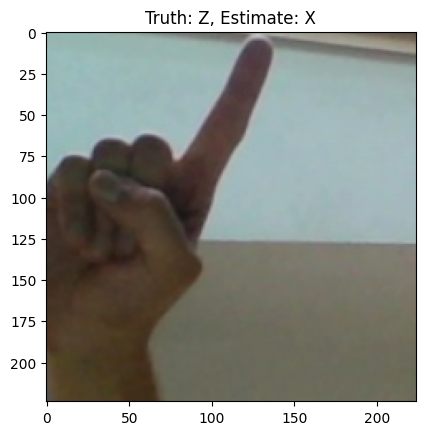

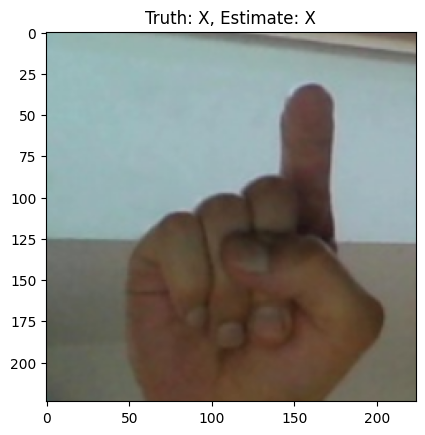

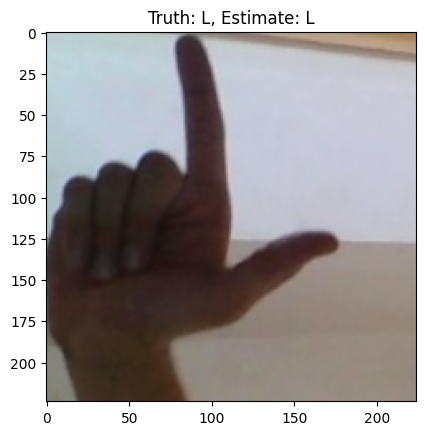

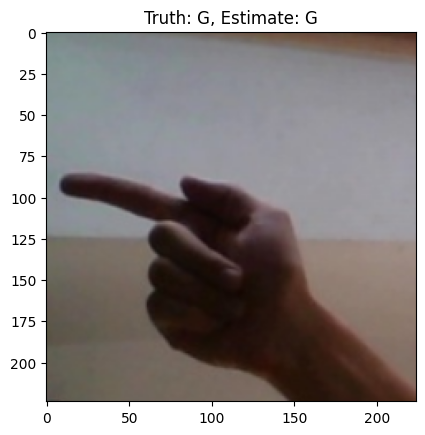

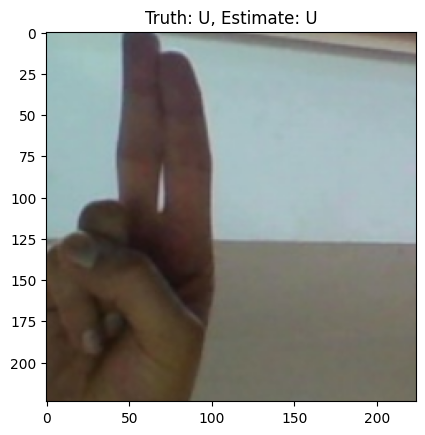

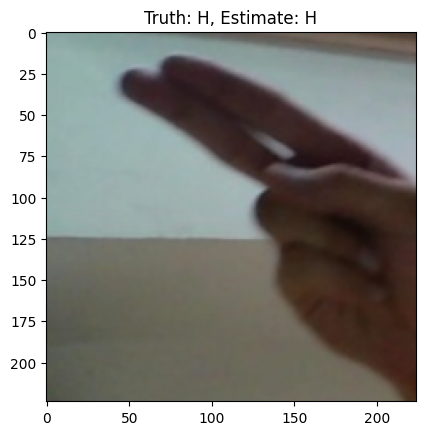

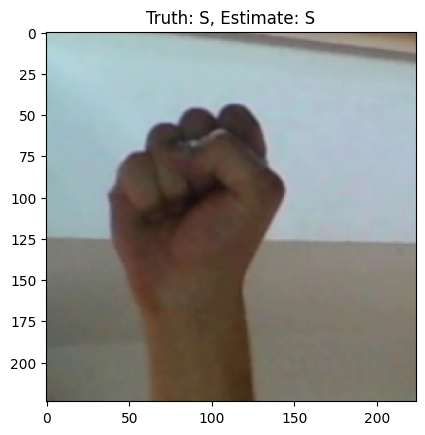

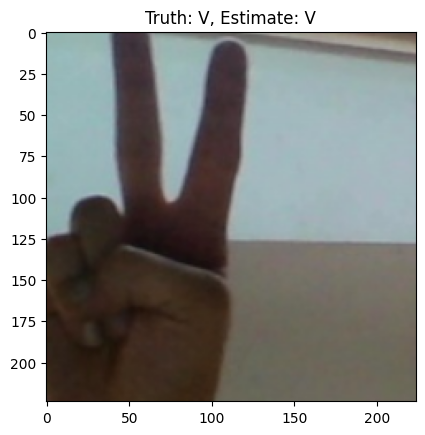

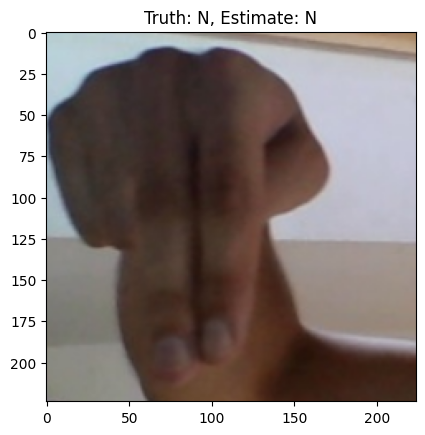

In [3]:
from matplotlib import pyplot as plt

image_net.to("cuda")
model.to("cuda")

image_net.eval()
model.eval()

for item in test_loader:
    label = item["label"][0]
    image = item["image"].to(torch.float).to("cuda")

    emb = model(image_net(image))
    est = torch.nn.functional.softmax(emb).argmax()

    plt.title(f"Truth: {classes[label]}, Estimate: {classes[est]}")
    plt.imshow(image[0].to("cpu").movedim(0, 2))
    plt.show()